In [1]:
import allesfitter

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import ascii
from astropy.timeseries import LombScargle

import scipy
from scipy.fft import fftfreq
from scipy.fft import fft

import allesfitter

import lightkurve as lk
import os

# 1) Downloading lightcurve

       time             flux         flux_err   
                                                
------------------ -------------- --------------
1332.3003649568595  9.9432468e-01  5.3917444e-03
  1332.30175382281  9.9400353e-01  5.4059527e-03
1332.3031426887615  1.0038680e+00  5.3981468e-03
1332.3045315547115  1.0081099e+00  5.4047499e-03
 1332.305920420662  1.0008452e+00  5.4039424e-03
1332.3073092865843  9.9874413e-01  5.3964877e-03
1332.3086981525348  1.0014669e+00  5.4036975e-03
1332.3100870184855  9.9279702e-01  5.3949002e-03
1332.3114758844072  9.9833977e-01  5.4020523e-03
1332.3128647503586  9.9953568e-01  5.4132221e-03
               ...            ...            ...
1332.4364738162744  9.9419546e-01  5.3694961e-03
1332.4378626821667  1.0142649e+00  5.3806901e-03
1332.4392515480301  1.0113105e+00  5.3807297e-03
1332.4406404139227  1.0018137e+00  5.3707031e-03
1332.4420292797868  1.0025852e+00  5.3776810e-03
 1332.443418145679  1.0060854e+00  5.3847027e-03
1332.4448070115418  

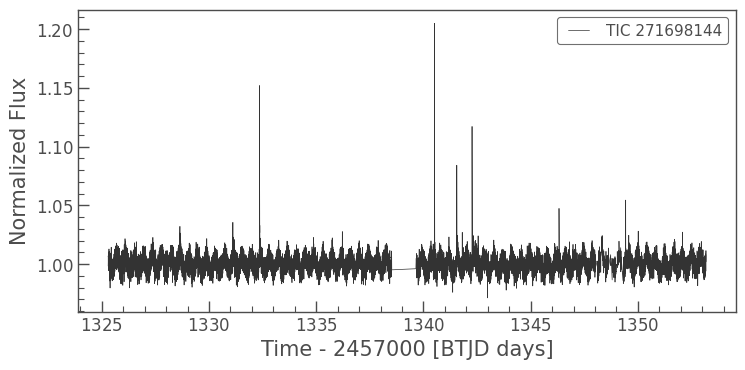

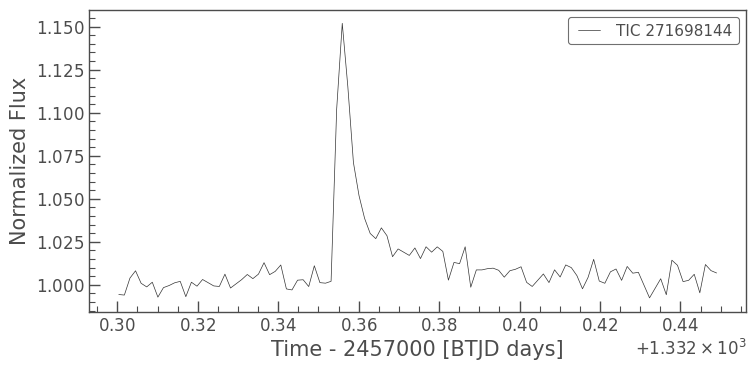

In [6]:
#search flare
search_result = lk.search_lightcurve('TIC 271698144')
search_result[0]

#plot flare
lc = search_result[0].download()
#lc.plot()

#remove nan values
lc1 = lc.remove_nans()
#lc1.plot()

#normalize
lc2 = lc1.normalize()
lc2.plot()       #actual flare normalized plot

#saving the plot by creating folder
folder = "lightkurve_plots"
if not os.path.exists(folder):
    os.makedirs(folder)
#plt.savefig("./lightkurve_plots/flare_1403938")

#to create fit file
#lc.to_fits(path='./TIC_233547261/TIC_233547261.fits', overwrite=True)

#to truncate values
lc3 = lc2.truncate(before = [1332.3], after = [1332.45])
lc3.plot()

lc3 = (lc3["time", "flux", "flux_err"]) #to get only time, flux and flux err values
print(lc3)

plt.savefig("./lightkurve_plots/flare_TIC_271698144_zoomed")
lc3.to_csv(path_or_buf = './allesfit/TIC_271698144.csv',overwrite=True)

# 2) Running nested sampling

In [8]:
#one flare

allesfitter.show_initial_guess('allesfit')
allesfitter.ns_fit('allesfit')
allesfitter.ns_output('allesfit')


! WARNING:
 You are using outdated keywords. Automatically renaming log_err_flux_TIC_271698144 ---> ln_err_flux_TIC_271698144. Please fix this before the Duolingo owl comes to get you.
type: <class 'UserWarning'>, file: /home/prachi/anaconda3/envs/Flare/lib/python3.9/site-packages/allesfitter/basement.py, line: 632


Filling the Basement


allesfitter version
---------------------
v1.2.10
OrderedDict([('user-given:', ''),
             ('companions_phot', ['b']),
             ('companions_rv', []),
             ('inst_phot', ['TIC_271698144']),
             ('inst_rv', []),
             ('multiprocess', True),
             ('multiprocess_cores', 'all'),
             ('fast_fit', 'False'),
             ('do_not_phase_fold', 'True'),
             ('shift_epoch', False),
             ('mcmc_nwalkers', '100'),
             ('mcmc_total_steps', '3000'),
             ('mcmc_burn_steps', '2000'),
             ('mcmc_thin_by', '10'),
             ('ns_modus', 'dynamic'),
             ('ns_nlive', '500'),
             ('ns_bound', 'single'),
             ('ns_sample', 'rwalk'),
             ('ns_tol', '0.01'),
             ('baseline_flux_TIC_271698144', 'hybrid_spline'),
             ('error_flux_TIC_271698144', 'sample'),
             ('N_flares', '1'),
             ('automatically set:', ''),
            

100%|██████████| 4/4 [00:00<00:00, 415.69it/s]


Plotting individual transits for companion b and instrument TIC_271698144...
Filling the Basement


allesfitter version
---------------------
v1.2.10
OrderedDict([('user-given:', ''),
             ('companions_phot', ['b']),
             ('companions_rv', []),
             ('inst_phot', ['TIC_271698144']),
             ('inst_rv', []),
             ('multiprocess', True),
             ('multiprocess_cores', 'all'),
             ('fast_fit', 'False'),
             ('do_not_phase_fold', 'True'),
             ('shift_epoch', False),
             ('mcmc_nwalkers', '100'),
             ('mcmc_total_steps', '3000'),
             ('mcmc_burn_steps', '2000'),
             ('mcmc_thin_by', '10'),
             ('ns_modus', 'dynamic'),
             ('ns_nlive', '500'),
             ('ns_bound', 'single'),
             ('ns_sample', 'rwalk'),
             ('ns_tol', '0.01'),
             ('baseline_flux_TIC_271698144', 'hybrid_spline'),
             ('error_flux_TIC_271698144', 'sample'),
        


! WARNING:
 You are using outdated keywords. Automatically renaming log_err_flux_TIC_271698144 ---> ln_err_flux_TIC_271698144. Please fix this before the Duolingo owl comes to get you.
type: <class 'UserWarning'>, file: /home/prachi/anaconda3/envs/Flare/lib/python3.9/site-packages/allesfitter/basement.py, line: 632



Running on 7 CPUs.


19112it [02:50, 111.96it/s, batch: 5 | bound: 26 | nc: 24 | ncall: 423379 | eff(%):  4.514 | loglstar: 382.390 < 387.697 < 386.866 | logz: 368.290 +/-  0.133 | stop:  0.991]           



Time taken to run 'dynesty' (in dynamic mode) is 0.05 hours



! WARNING:
 You are using outdated keywords. Automatically renaming log_err_flux_TIC_271698144 ---> ln_err_flux_TIC_271698144. Please fix this before the Duolingo owl comes to get you.
type: <class 'UserWarning'>, file: /home/prachi/anaconda3/envs/Flare/lib/python3.9/site-packages/allesfitter/basement.py, line: 632


Filling the Basement


allesfitter version
---------------------
v1.2.10
OrderedDict([('user-given:', ''),
             ('companions_phot', ['b']),
             ('companions_rv', []),
             ('inst_phot', ['TIC_271698144']),
             ('inst_rv', []),
             ('multiprocess', True),
             ('multiprocess_cores', 'all'),
             ('fast_fit', 'False'),
             ('do_not_phase_fold', 'True'),
             ('shift_epoch', False),
             ('mcmc_nwalkers', '100'),
             ('mcmc_total_steps', '3000'),
             ('mcmc_burn_steps', '2000'),
             ('mcmc_thin_by', '10'),
             ('ns_modus', 'dynamic'),
             ('ns_nlive', '500'),
             ('ns_bound', 'single'),
             ('ns_sample', 'rwalk'),
             ('ns_tol', '0.01'),
             ('baseline_flux_TIC_271698144', 'hybrid_spline'),
             ('error_flux_TIC_271698144', 'sample'),
             ('N_flares', '1'),
             ('automatically set:', ''),
            

100%|██████████| 4/4 [00:00<00:00, 26.62it/s]


Plotting individual transits for companion b and instrument TIC_271698144...

Results:
----------
log(Z) = 368.2986318637867 +- 0.11846378502417583
Nr. of posterior samples: 19112
Deriving eclipse depths (and more) from the model curves for companion b and instrument TIC_271698144...

No values available to be derived.

Performing diagnostic tests on the fit's residuals...

Anderson-Darling Test
---------------------
This tests the null hypothesis that the residuals follows a normal distribution.
Test statistic		 0.17574095530447664
Critical values		 [0.556 0.633 0.759 0.885 1.053]
Significance levels	 [0.15  0.1   0.05  0.025 0.01 ]
Does the null hypotheses hold at a significance level of...
... 0.15 		 True
... 0.1 		 True
... 0.05 		 True
... 0.025 		 True
... 0.01 		 True
The null hypothesis cannot be rejected.
In simple words: your residuals look good.


Augmented Dickey-Fuller Test
----------------------------
This tests the null hypothesis that the residuals show non-stationarit

'"Gentlemen, you can\'t fight in here! This is the War Room!" - President Merkin Muffley, Dr. Strangelove\n'

# 3) Run residuals 

In [9]:
#     ::: your settings
datadir = 'allesfit' #change this to what you need
inst = 'TIC_271698144' #change this to what you need
key = 'flux' #change this to what you need


#     ::: initialize the allesclass
alles = allesfitter.allesclass(datadir);


#     ::: load the data (and the correct error bars)
time = alles.data[inst]['time']
flux = alles.data[inst][key]
flux_err = alles.data[inst]['err_scales_'+key] * alles.posterior_params_median['err_'+key+'_'+inst]


#     ::: load the median baseline, median lightcurve model, and median residuals
baseline = alles.get_posterior_median_baseline(inst, key)
model = alles.get_posterior_median_model(inst, key)
residuals = alles.get_posterior_median_residuals(inst, key)


#     ::: save everything to a file for your collaborators
X = np.column_stack((time, flux, flux_err,residuals)) #detrended_flux, model, residuals))
np.savetxt('residual_TIC_271698144.csv', X, delimiter=',')

Filling the Basement

OrderedDict([('user-given:', ''),
             ('companions_phot', ['b']),
             ('companions_rv', []),
             ('inst_phot', ['TIC_271698144']),
             ('inst_rv', []),
             ('multiprocess', True),
             ('multiprocess_cores', 'all'),
             ('fast_fit', 'False'),
             ('do_not_phase_fold', 'True'),
             ('shift_epoch', False),
             ('mcmc_nwalkers', '100'),
             ('mcmc_total_steps', '3000'),
             ('mcmc_burn_steps', '2000'),
             ('mcmc_thin_by', '10'),
             ('ns_modus', 'dynamic'),
             ('ns_nlive', '500'),
             ('ns_bound', 'single'),
             ('ns_sample', 'rwalk'),
             ('ns_tol', '0.01'),
             ('baseline_flux_TIC_271698144', 'hybrid_spline'),
             ('error_flux_TIC_271698144', 'sample'),
             ('N_flares', '1'),
             ('automatically set:', ''),
             ('time_format', 'BJD_TDB'),
             ('inst_rv


! WARNING:
 You are using outdated keywords. Automatically renaming log_err_flux_TIC_271698144 ---> ln_err_flux_TIC_271698144. Please fix this before the Duolingo owl comes to get you.
type: <class 'UserWarning'>, file: /home/prachi/anaconda3/envs/Flare/lib/python3.9/site-packages/allesfitter/basement.py, line: 632

! WARNING:
 No NS nor MCMC derived file detected.
type: <class 'UserWarning'>, file: /home/prachi/anaconda3/envs/Flare/lib/python3.9/site-packages/allesfitter/__init__.py, line: 140


# 4) Opening residual file

In [10]:
colnames = ("time" , "flux" , "flux_err" , "residuals")
file = ascii.read("residual_TIC_271698144.csv", Reader=ascii.NoHeader, names=colnames)
#     print(file)

# 5) Plots (data, residuals, residuals zoom, and Lomb Scargle periodogram all in one plot)

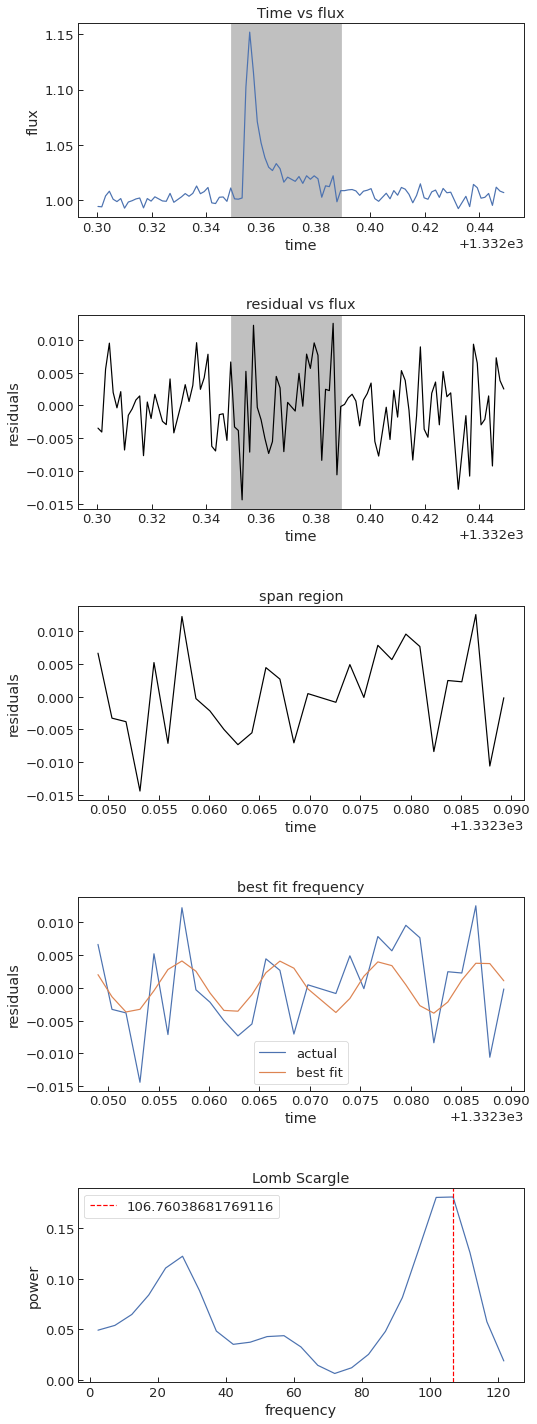

In [15]:

time = file["time"]
flux = file["flux"]
residuals = file ["residuals"]

t_start = 1.332348975264551427e+03
t_end = 1.332389252376017339e+03


#plots side by side
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1, figsize = (8,25))

#time vs flux

ax1.title.set_text("Time vs flux")
ax1.plot(time, flux, 'b-')
ax1.axvspan(t_start,t_end, color = 'silver')
ax1.set_xlabel("time")
ax1.set_ylabel("flux")

#plot of time vs residuals with span
ax2.axvspan(t_start,t_end, color = 'silver')
ind = np.where((time >= t_start) & (time <= t_end))
ax2.title.set_text("residual vs flux")
ax2.plot(time, residuals, 'black')
ax2.set_xlabel("time")
ax2.set_ylabel("residuals")

#plot of span region
time_2 = time[ind]
residuals_2 = residuals[ind]
ax3.title.set_text("span region")
ax3.plot(time_2,residuals_2, 'black')
ax3.set_xlabel("time")
ax3.set_ylabel("residuals")

#Best frequency
frequency, power = LombScargle(time_2, residuals_2).autopower(minimum_frequency=1,maximum_frequency=100)
best_frequency = frequency[np.argmax(power)]
t_fit = time_2
ls = LombScargle(time_2, residuals_2)
y_fit = ls.model(t_fit, best_frequency)
ax4.plot(time_2,residuals_2, label = "actual")
ax4.plot(t_fit, y_fit, label = "best fit")
ax4.title.set_text("best fit frequency")
ax4.set_xlabel("time")
ax4.set_ylabel("residuals")
ax4.legend()

#lomb scargle applied
frequency, power = LombScargle(time_2, residuals_2).autopower(maximum_frequency=120)
ax5.plot(frequency,np.abs(power))
ax5.title.set_text("Lomb Scargle")
ax5.set_xlabel("frequency")
ax5.set_ylabel("power")

# marking lines on lomb scargle plot
max_power = max(power)  # Find the maximum y value
max_freq = frequency[power.argmax()] #Find the x value corresponding to the max y value
plt.axvline(x=max_freq, color = "red", linestyle = "--", label = max_freq)
plt.legend()

plt.subplots_adjust(hspace=0.5)
